# PCA(Principal Component Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## iris dataset를 통해서 PCA 수행

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### numpy 로 차원축소

In [5]:
# 표준 스케일러로 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 모집단에서 공분산 행렬 구하기
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [14]:
# 표본 집단에서 공분산 행렬 구하기
np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
# 표본 집단에서 공분산 행렬 구하기
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [17]:
# 고유벡터(아이겐벡터), 고유값 구하기
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [18]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [40]:
# 주성분 PC1
PC1 = np.dot(iris_std, eig_vecs.T[1].reshape(-1, 1))
PC1[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [41]:
# 주성분 PC2
PC2 = np.dot(iris_std, eig_vecs.T[1].reshape(-1, 1))
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [42]:
iris_PCA = pd.DataFrame({
    'PC1': PC1.reshape(-1,),
    'PC2': PC2.reshape(-1,),
    'species': iris.target
})
iris_PCA.head()

,PC1,PC2,species
0,-0.480027,-0.480027,0
1,0.674134,0.674134,0
2,0.341908,0.341908,0
3,0.597395,0.597395,0
4,-0.646835,-0.646835,0


In [29]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### sklearn 으로 차원 축소

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [35]:
# fit() and transform 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [36]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [56]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## 데이터 시각화

In [48]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
iris_df = pd.DataFrame(data=iris.data, columns=columns)
iris_df['Species'] = iris.target
iris_df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


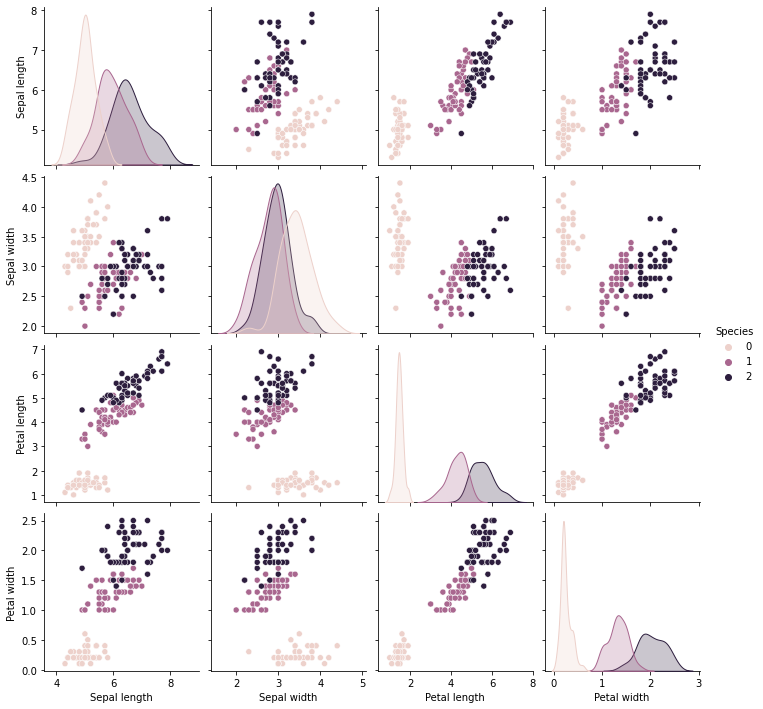

In [49]:
sns.pairplot(iris_df, hue='Species')

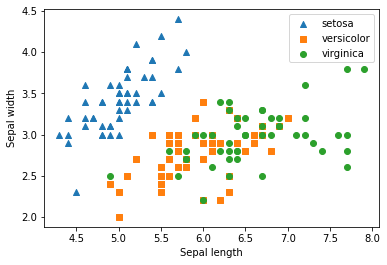

In [51]:
# setosa는 세모 versicolor는 네모, virginica는 동그라미
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['Species'] == i]['Sepal length']
    y_axis_data = iris_df[iris_df['Species'] == i]['Sepal width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## PCA 변환 후 시각화

In [52]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df['Species'] = iris.target
iris_pca_df.head()

,PC1,PC2,Species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


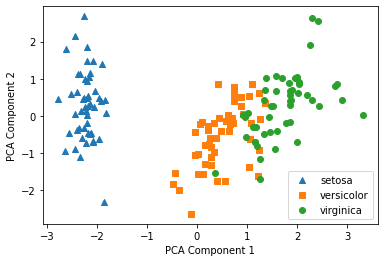

In [55]:
# setosa는 세모 versicolor는 네모, virginica는 동그라미
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df['Species'] == i]['PC1']
    y_axis_data = iris_pca_df[iris_pca_df['Species'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## 차원 축소하기 전 데이터로 분류

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    stratify=iris.target,
    test_size=0.3,
    random_state=2021,
)

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

## 차원 축소한 데이터로 분류

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca_df[['PC1', 'PC2']], 
    iris.target, 
    stratify=iris.target,
    test_size=0.3,
    random_state=2021,
)

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111